# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [342]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [343]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [344]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [345]:
sinasc_raw['faixaLat'] = sinasc_raw.munResLat.map(lambda x: 'acima de -10.5' if x > -10.5 else 'abaixo de -10.5')

sinasc_raw.faixaLat.value_counts()

acima de -10.5     14034
abaixo de -10.5    12994
Name: faixaLat, dtype: int64

In [346]:
sinasc_raw.groupby('faixaLat').agg({
    'APGAR1':[('Soma','sum'),('Média','mean'),('Mínimo','min'),('Máximo','max'),('Mediana','median'),('DesvioPadrão','std'),('Variância','var')],
    
    'APGAR5': [('Soma','sum'),('Média','mean'),('Mínimo','min'),('Máximo','max'),('Mediana','median'),('DesvioPadrão','std'),('Variância','var')]
})

APGAR1                                               \
                     Soma     Média Mínimo Máximo Mediana DesvioPadrão   
faixaLat                                                                 
abaixo de -10.5  104599.0  8.070288    0.0   10.0     8.0     0.960765   
acima de -10.5   114559.0  8.199771    0.0   10.0     8.0     1.002839   

                             APGAR5                                  \
                Variância      Soma     Média Mínimo Máximo Mediana   
faixaLat                                                              
abaixo de -10.5  0.923069  118403.0  9.138855    0.0   10.0     9.0   
acima de -10.5   1.005686  128746.0  9.216551    0.0   10.0     9.0   

                                        
                DesvioPadrão Variância  
faixaLat                                
abaixo de -10.5     0.805385  0.648645  
acima de -10.5      0.774741  0.600224

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [347]:
sinasc_raw['faixaArea'] = sinasc_raw.munResArea.map(lambda x: 'acima de 3000' if x > 3000 else 'abaixo de 3000')

sinasc_raw.faixaArea.value_counts()

acima de 3000     21808
abaixo de 3000     5220
Name: faixaArea, dtype: int64

In [348]:
sinasc_raw.groupby('faixaArea').agg({
    'QTDFILVIVO':[('Soma','sum'),('Média','mean'),('Mínimo','min'),('Máximo','max'),('Mediana','median'),('DesvioPadrão','std'),('Variância','var')],
    
    'QTDFILMORT': [('Soma','sum'),('Média','mean'),('Mínimo','min'),('Máximo','max'),('Mediana','median'),('DesvioPadrão','std'),('Variância','var')]
})

QTDFILVIVO                                               \
                     Soma     Média Mínimo Máximo Mediana DesvioPadrão   
faixaArea                                                                
abaixo de 3000     4774.0  0.924298    0.0   30.0     1.0     1.075338   
acima de 3000     22053.0  1.086890    0.0   14.0     1.0     1.191750   

                         QTDFILMORT                                  \
               Variância       Soma     Média Mínimo Máximo Mediana   
faixaArea                                                             
abaixo de 3000  1.156352     1261.0  0.244949    0.0    4.0     0.0   
acima de 3000   1.420268     5383.0  0.272116    0.0   28.0     0.0   

                                       
               DesvioPadrão Variância  
faixaArea                              
abaixo de 3000     0.551262  0.303889  
acima de 3000      0.629081  0.395743

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [349]:
sinasc_raw['faixaMunResAlt'] = sinasc_raw.munResAlt.map(lambda x: 'acima de 340' if x > 340 else 'abaixo de 340')

sinasc_raw.faixaMunResAlt

0        abaixo de 340
1        abaixo de 340
2        abaixo de 340
3         acima de 340
4        abaixo de 340
             ...      
27023     acima de 340
27024    abaixo de 340
27025     acima de 340
27026     acima de 340
27027    abaixo de 340
Name: faixaMunResAlt, Length: 27028, dtype: object

In [350]:
sinasc_raw.groupby('faixaMunResAlt').agg({
    'QTDGESTANT':[('Soma','sum'),('Média','mean'),('Mínimo','min'),('Máximo','max'),('Mediana','median'),('DesvioPadrão','std'),('Variância','var')],
    
    'QTDPARTNOR': [('Soma','sum'),('Média','mean'),('Mínimo','min'),('Máximo','max'),('Mediana','median'),('DesvioPadrão','std'),('Variância','var')]
})

QTDGESTANT                                               \
                     Soma     Média Mínimo Máximo Mediana DesvioPadrão   
faixaMunResAlt                                                           
abaixo de 340     30689.0  1.285942    0.0   52.0     1.0     1.418514   
acima de 340       2229.0  1.142491    0.0    9.0     1.0     1.214102   

                         QTDPARTNOR                                  \
               Variância       Soma     Média Mínimo Máximo Mediana   
faixaMunResAlt                                                        
abaixo de 340   2.012183    13912.0  0.599681    0.0   41.0     0.0   
acima de 340    1.474045      660.0  0.338462    0.0    9.0     0.0   

                                       
               DesvioPadrão Variância  
faixaMunResAlt                         
abaixo de 340      1.232118  1.518115  
acima de 340       0.855554  0.731973

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [351]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [352]:
sinasc_item4 = sinasc_raw[['IDADEMAE','munResNome']].set_index('munResNome')
sinasc_item4 = sinasc_item4.groupby(imediatas).agg({
    'IDADEMAE':[('Média','mean')]
})

sinasc_item4

,IDADEMAE
,Média
munResNome,
Ariquemes,25.459635
Cacoal,26.347817
Jaru,25.708853
Ji-Paraná,26.094720
Porto Velho,26.166303
Vilhena,26.417143


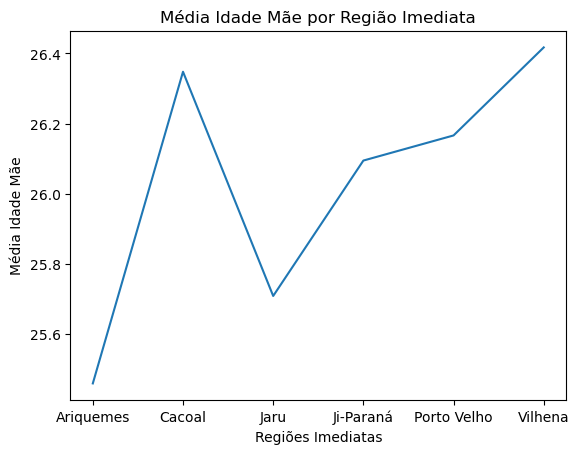

In [355]:
sinasc_item4.plot(title='Média Idade Mãe por Região Imediata', xlabel='Regiões Imediatas', ylabel='Média Idade Mãe', legend=None);

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


In [367]:
municipio_Faixas = pd.read_csv('idh-ifdm-pib.csv',sep=';',encoding='latin_1')
municipio_Faixas.head()

,municipio,idh,ifdm,pib
0,Alta Floresta D'Oeste,0.641,0.6337,496000
1,Alto Alegre dos Parecis,0.592,0.5046,213410
2,Alto Paraíso,0.625,0.5735,358000
3,Alvorada D'Oeste,0.643,0.5919,204098
4,Ariquemes,0.702,0.7746,2579830


In [365]:
sinasc_item5 = sinasc_raw.set_index('munResNome')
sinasc_item5.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea,faixaLat,faixaArea,faixaMunResAlt
munResNome,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,abaixo de -10.5,acima de 3000,abaixo de 340
Alta Floresta D'Oeste,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,abaixo de -10.5,acima de 3000,abaixo de 340
Alta Floresta D'Oeste,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,abaixo de -10.5,acima de 3000,abaixo de 340
Alto Alegre dos Parecis,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,ATIVO,MUNIC,Rondônia,-12.13178,-61.85308,397.0,3958.273,abaixo de -10.5,acima de 3000,acima de 340
Alta Floresta D'Oeste,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,abaixo de -10.5,acima de 3000,abaixo de 340


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [368]:
#Segundo Lista de municípios de Rondônia por IDH-M, existe apenas municípios com indices Alto, Médio e Baixo.
municipio_Faixas['faixaIDH'] = municipio_Faixas.idh.map(lambda x: 'médio' if 0.7>x>=0.6 else ('alto' if x >= 0.7 else 'baixo'))
municipio_Faixas.head()

,municipio,idh,ifdm,pib,faixaIDH
0,Alta Floresta D'Oeste,0.641,0.6337,496000,médio
1,Alto Alegre dos Parecis,0.592,0.5046,213410,baixo
2,Alto Paraíso,0.625,0.5735,358000,médio
3,Alvorada D'Oeste,0.643,0.5919,204098,médio
4,Ariquemes,0.702,0.7746,2579830,alto


                IDADEMAE
                   Média
IDH Município           
alto           26.280332
baixo          25.326944
médio          25.884855


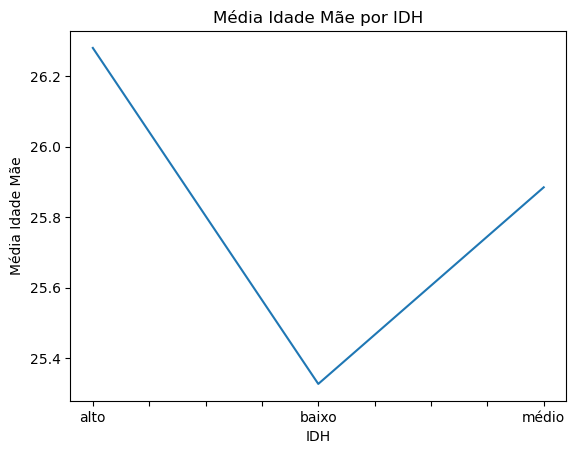

In [428]:
mappingIDH = {}
for nome in municipio_Faixas.municipio:
   mappingIDH[nome] = municipio_Faixas.loc[municipio_Faixas.municipio == nome].faixaIDH.values[0]

resultadoIDH = sinasc_item5.groupby(mappingIDH).agg({
    'IDADEMAE':[('Média','mean')],
}).rename_axis("IDH Município")
print(resultadoIDH)
resultadoIDH.plot(title='Média Idade Mãe por IDH', xlabel='IDH', ylabel='Média Idade Mãe', legend=None);



### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [387]:
## Segundo Lista de municípios de Rondônia por IFDM, existem apenas municípios com índices moderado e regular, com faixa de corte entre os dois em 0.600
municipio_Faixas['faixaIFDM'] = municipio_Faixas.ifdm.map(lambda x: 'moderado' if 0.6>x else 'regular')
municipio_Faixas.head()

,municipio,idh,ifdm,pib,faixaIDH,faixaIFDM
0,Alta Floresta D'Oeste,0.641,0.6337,496000,médio,regular
1,Alto Alegre dos Parecis,0.592,0.5046,213410,baixo,moderado
2,Alto Paraíso,0.625,0.5735,358000,médio,moderado
3,Alvorada D'Oeste,0.643,0.5919,204098,médio,moderado
4,Ariquemes,0.702,0.7746,2579830,alto,regular


                 IDADEMAE
                    Média
IFDM Município           
moderado        25.535131
regular         26.223139


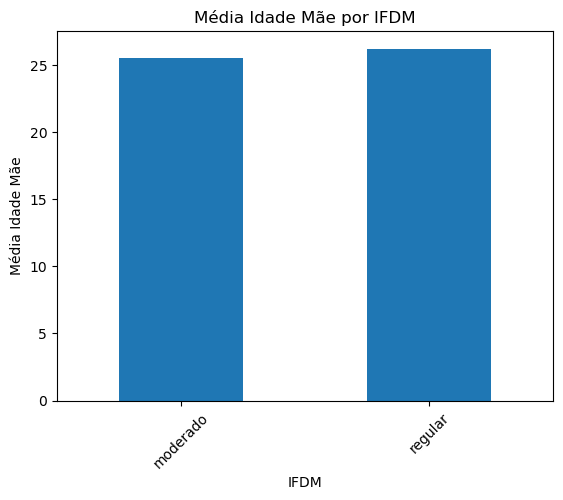

In [415]:
mappingIFDM = {}
for nome in municipio_Faixas.municipio:
   mappingIFDM[nome] = municipio_Faixas.loc[municipio_Faixas.municipio == nome].faixaIFDM.values[0]

resultadoIFDM = sinasc_item5.groupby(mappingIFDM).agg({
    'IDADEMAE':[('Média','mean')]
}).rename_axis("IFDM Município")

print(resultadoIFDM)
resultadoIFDM.plot.bar(title='Média Idade Mãe por IFDM', xlabel='IFDM', ylabel='Média Idade Mãe', legend=None, rot=45);

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [389]:
## faixas de pib extraidos da Lista de municípios de Rondônia por PIB
faixasPib = {
    'Até 100 Milhões'       :100000,
    'Acima de 100 Milhões'  :200000,
    'Acima de 200 Milhões'  :300000,
    'Acima de 300 Milhões'  :500000,
    'Acima de 500 Milhões'  :1000000,
    'Acima de 1 Bilhão'     :1000000,   
}

def faixaPib (x,faixasPib):
    for y in faixasPib:
        if x < faixasPib[y]:
            return y
    return list(faixasPib)[-1]


In [390]:
municipio_Faixas['faixaPIB'] = municipio_Faixas.pib.map(lambda x:faixaPib(x,faixasPib) )
municipio_Faixas.head()

,municipio,idh,ifdm,pib,faixaIDH,faixaIFDM,faixaPIB
0,Alta Floresta D'Oeste,0.641,0.6337,496000,médio,regular,Acima de 300 Milhões
1,Alto Alegre dos Parecis,0.592,0.5046,213410,baixo,moderado,Acima de 200 Milhões
2,Alto Paraíso,0.625,0.5735,358000,médio,moderado,Acima de 300 Milhões
3,Alvorada D'Oeste,0.643,0.5919,204098,médio,moderado,Acima de 200 Milhões
4,Ariquemes,0.702,0.7746,2579830,alto,regular,Acima de 1 Bilhão


                       IDADEMAE   IDADEPAI
                          Média      Média
PIB Município                             
Acima de 1 Bilhão     26.265562  31.108387
Acima de 100 Milhões  25.662910  31.602102
Acima de 200 Milhões  25.323204  30.386441
Acima de 300 Milhões  25.833511  30.183386
Acima de 500 Milhões  25.782528  31.322907
Até 100 Milhões       26.515081  31.585185


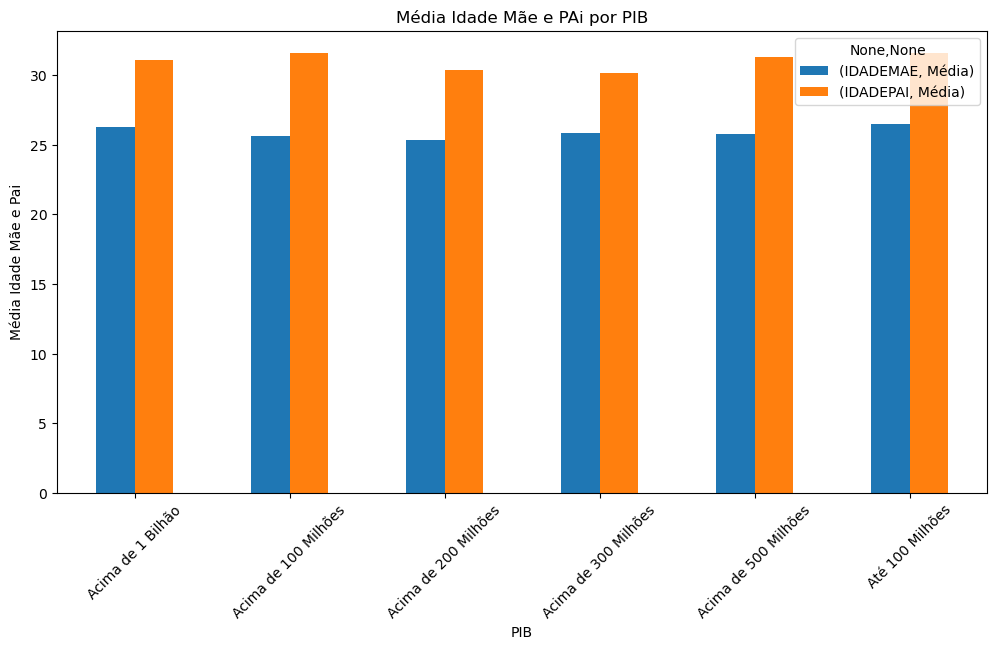

In [429]:
mappingPIB = {}
for nome in municipio_Faixas.municipio:
   mappingPIB[nome] = municipio_Faixas.loc[municipio_Faixas.municipio == nome].faixaPIB.values[0]

resultadoPIB = sinasc_item5.groupby(mappingPIB).agg({
    'IDADEMAE':[('Média','mean')],
    'IDADEPAI':[('Média','mean')]

}).rename_axis("PIB Município")

print(resultadoPIB)

resultadoPIB.plot.bar(title='Média Idade Mãe e PAi por PIB', xlabel='PIB', ylabel='Média Idade Mãe e Pai', rot=45,figsize=(12, 6));

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

## ITEM 5.1
Foi identificado que quanto maior o IDH maior a idade média das mães

## ITEM 5.3 
Independente do PIB a idade dos pais sempre é maior que a das mães